# Python training UGA 2017

**A training to acquire strong basis in Python to use it efficiently**

Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Eric Maldonado (Irstea), Franck Thollard (ISTerre), Oliver Henriot (GRICAD), Christophe Picard (LJK), Loïc Huder (ISTerre)

# Python scientific ecosystem
# A short introduction to Matplotlib ([gallery](http://matplotlib.org/gallery.html))

The default library to plot data is `Matplotlib`.
It allows one the creation of graphs that are ready for publications with the same functionality than Matlab.

In [1]:
# these ipython commands load special backend for notebooks 
# (do not use "notebook" outside jupyter)
# %matplotlib notebook
# for jupyter-lab:
# %matplotlib ipympl
%matplotlib inline

When running code using matplotlib, it is highly recommended to start ipython with the option `--matplotlib` (or to use the magic ipython command `%matplotlib`).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.random.random([5,5])

You can plot any kind of numerical data.

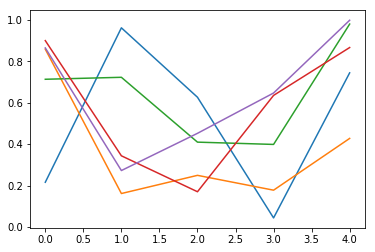

In [4]:
lines = plt.plot(A)

In scripts, the `plt.show` method needs to be invoked at the end of the script.

We can plot data by giving specific coordinates.

In [5]:
x = np.linspace(0, 2, 20)
y = x**2

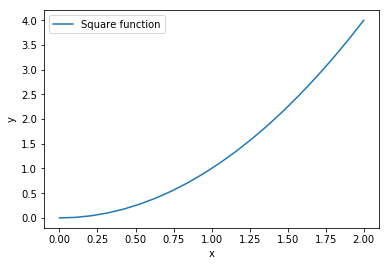

In [6]:
plt.figure()
plt.plot(x,y, label='Square function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

We can associate the plot with an object figure. This object will allow us to add labels, subplot, modify the axis or save it as an image.

Text(0, 0.5, '$\\Pi / \\epsilon$')

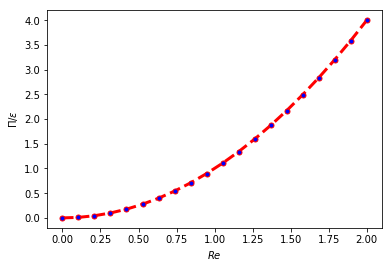

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = ax.plot(x, y, color="red", linestyle='dashed', linewidth=3, marker='o',
        markerfacecolor='blue', markersize=5)

ax.set_xlabel('$Re$')
ax.set_ylabel('$\Pi / \epsilon$')

We can also recover the plotted matplotlib object to get info on it.

In [8]:
line_object = res[0]
print(type(line_object))
print('Color of the line is', line_object.get_color())
print('X data of the plot:', line_object.get_xdata())

<class 'matplotlib.lines.Line2D'>
Color of the line is red
X data of the plot: [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


### Example of multiple subplots

Text(0.5, 0, 'Angle (rad)')

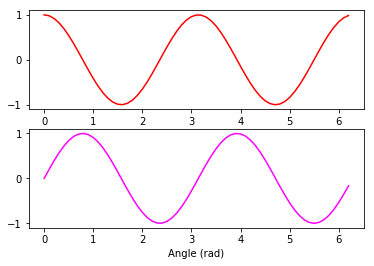

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # First, number of subplots along X (2), then along Y (1), then the id of the subplot (1)
ax2 = fig.add_subplot(212, sharex=ax1) # It is possible to share axes between subplots
X = np.arange(0, 2*np.pi, 0.1)
ax1.plot(X, np.cos(2*X), color="red")
ax2.plot(X, np.sin(2*X), color="magenta")
ax2.set_xlabel('Angle (rad)')

## Anatomy of a Matplotlib figure

![Anatomy of a figure](fig/anatomy.png)

For consistent figure changes, define your own stylesheets that are basically a list of parameters to tune the aspect of the figure elements.
See https://matplotlib.org/tutorials/introductory/customizing.html for more info.

We can also plot 2D data arrays.

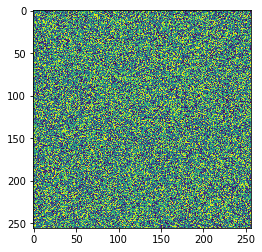

In [10]:
noise = np.random.random((256,256))
plt.figure()
plt.imshow(noise)

We can also add a colorbar and adjust the colormap.

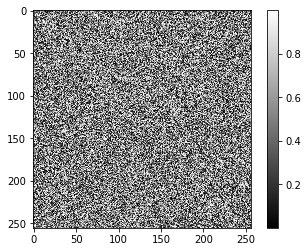

In [11]:
plt.figure()
plt.imshow(noise, cmap=plt.cm.gray)
plt.colorbar()

#### Choose your colormaps wisely !
When doing such colorplots, it is easy to lose the interesting features by setting a colormap that is not adapted to the data. 

Also, when producing scientific figures, think about how will your plot will look like to colorblind people or in greyscales (as it can happen in printed articles...).

See the interesting discussion on matplotlib website: https://matplotlib.org/users/colormaps.html.

## Other plot types
Matplotlib also allows to plot:
- Histograms
- Plots with error bars
- Box plots
- Contours
- in 3D
- ...

See the [gallery](http://matplotlib.org/gallery.html) to see what suits you the most.

## Do it yourself:

With miscellaneous routines of scipy we can get an example image:

In [12]:
import scipy.misc
raccoon = np.array(scipy.misc.face())

Write a script to print shape and dtype the raccoon image. Next plot the image using matplotlib.

In [13]:
print("shape of raccoon = ", raccoon.shape)
print("dtype of raccoon = ", raccoon.dtype)

shape of raccoon =  (768, 1024, 3)
dtype of raccoon =  uint8


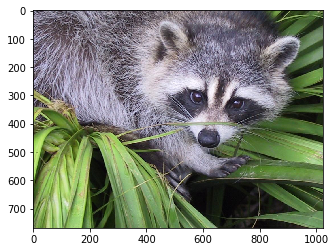

In [14]:
plt.imshow(raccoon)

0. Write a script to generate a border around the raccoon image (for example a 20 pixel size black border; black color code is 0 0 0)

1. Do it again without losing pixels and generate then a raccoon1 array/image

2.  1. Mask the face of the raccoon with a grey circle (centered of radius 240 at location 690 260 of the raccoon1 image; grey color code is for example (120 120 120))
    2. Mask the face of the raccon with a grey square by using NumPy broadcast capabilities (height and width 480 and same center as before)

3. We propose to smooth the image : the value of a pixel of the smoothed image is the the average of the values of its neighborhood (ie the 8 neighbors + itself).


### Solution 0 

Write a script to generate a border around the raccoon image (for example a 20 pixel size black border; black color code is 0 0 0)

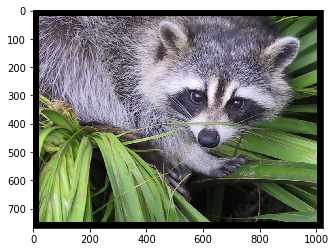

In [15]:
raccoon[0:20, :, :] = 0
raccoon[-20:-1, :, :] = 0
raccoon[:, 0:20, :] = 0
raccoon[:, -20:-1, :] = 0
plt.imshow(raccoon)

### Solution 1

Do it again without losing pixels and generate then a raccoon1 array/image

shape of raccoon =  (768, 1024, 3)
shape of raccoon1 =  (808, 1064, 3)


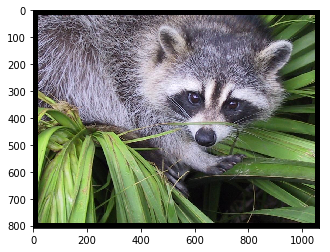

In [16]:
raccoon = np.array(scipy.misc.face())
print("shape of raccoon = ", raccoon.shape)
n0, n1, n2 = raccoon.shape
raccoon1 = np.zeros((n0+40, n1+40, n2), dtype = np.uint8)
raccoon1[20:20+n0, 20:20+n1, :] = raccoon[:,:,:]
print("shape of raccoon1 = ", raccoon1.shape)
plt.imshow(raccoon1)

### Solution 2.A

Mask the face of the raccoon with a grey circle (centered of radius 240 at location 690 260 of the raccoon1 image; grey color code is for example (120 120 120))

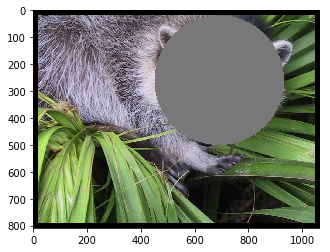

In [17]:
raccoon2A = raccoon1.copy()
x_center = 260
y_center = 690
radius = 240
x_max, y_max, z = raccoon2A.shape
for i in range(x_max):
    for j in range(y_max):
        if ((j - y_center)**2 + (i-x_center)**2) <= radius**2:
            raccoon2A[i, j, :] = 120
plt.imshow(raccoon2A)

### Solution 2.B

Mask the face of the raccon with a grey square by using NumPy broadcast capabilities (height and width 480 and same center as before)

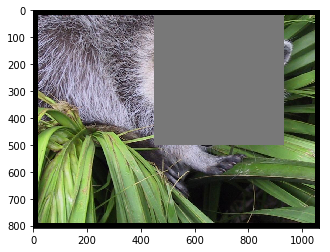

In [18]:
raccoon2B = raccoon1.copy()

raccoon2B[x_center-radius:x_center+radius, y_center-radius:y_center+radius, :] = 120

plt.imshow(raccoon2B)

### Solution 3

We propose to smooth the image : the value of a pixel of the smoothed image is the
the average of the values of its neighborhood (ie the 8 neighbors + itself).

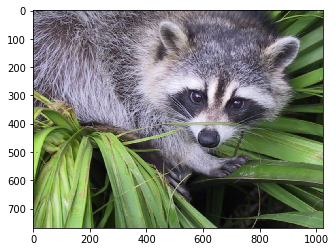

In [19]:
import scipy.misc
raccoon = scipy.misc.face().astype(np.uint16)
n0, n1, n2 = raccoon.shape
raccoon1 = np.zeros((n0, n1, n2), dtype = np.uint8)
for i in range(n0):
    for j in range(n1):
        if ((i!=0) and (i!=n0-1) and (j!=0) and (j!=n1-1)):
            tmp = (
                raccoon[i, j] + raccoon[i+1, j] + raccoon[i-1, j] + raccoon[i, j+1] + raccoon[i, j-1]
                + raccoon[i+1, j+1] + raccoon[i-1, j-1] + raccoon[i+1, j-1] + raccoon[i-1, j+1])
            raccoon1[i, j] = tmp/9
plt.imshow(raccoon1)

## Extra : 
- Try to optimize (vectorization can be a solution)


- You can check what is a "sum area table" (or integral image) https://en.wikipedia.org/wiki/Summed-area_table and how to use it in our example.
- compute the area image (check the "cumsum" numpy function)
- use it to smooth your image.

### Solution extra

5.71 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.3 ms ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
233 ms ± 640 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
78.7 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
106 ms ± 370 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


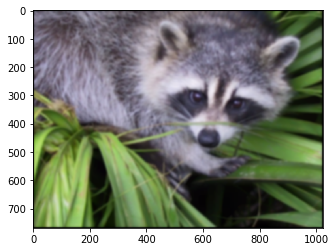

In [20]:
def smooth(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    for i in range(n0):
        for j in range(n1):
            if ((i!=0) and (i!=n0-1) and (j!=0) and (j!=n1-1)):
                tmp = (
                    img[i, j] + img[i+1, j] + img[i-1, j] + img[i, j+1] + img[i, j-1] +
                    img[i+1, j+1] + img[i-1, j-1] + img[i+1, j-1] + img[i-1, j+1])
                img1[i, j] = tmp/9
    return img1.astype(np.uint8)


def smooth1(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    img1[1:n0-1, 1:n1-1] = (
        img[1:n0-1,1:n1-1] + img[2:n0, 1:n1-1] + img[0:n0-2, 1:n1-1] + img[1:n0-1, 2:n1] +
        img[1:n0-1, 0:n1-2] + img[2:n0, 2:n1] + img[0:n0-2, 0:n1-2] + img[2:n0, 0:n1-2] +
        img[0:n0-2, 2:n1])
    img1 = img1/9
    return img1.astype(np.uint8)


def smooth2(img):
    from scipy import signal
    img = img.astype(np.uint16)
    square8 = np.ones((3, 3), dtype=np.uint16)
    for i in range(3):
        img[:, :, i] = signal.fftconvolve(img[:, :, i], square8, mode='same')/9
    return img.astype(np.uint8)
    
    
def smooth3(img):
    from scipy import signal
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    square8 = np.ones((3, 3), dtype=np.uint16)
    for i in range(3):
        img1[:, :, i] = signal.convolve2d(img[:, :, i], square8, mode='same')/9
    return img1.astype(np.uint8)
   
    
def smooth4(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    sum_area = np.cumsum(np.cumsum(img, axis=0), axis=1)
    img1[2:n0-1, 2:n1-1] = (
        sum_area[3:n0, 3:n1] + sum_area[0:n0-3, 0:n1-3] - 
        sum_area[3:n0, 0:n1-3] - sum_area[0:n0-3, 3:n1])
    img1 = img1/9
    return img1.astype(np.uint8)

    
def smooth_loop(method, niter, img):
    for i in range(niter):
        img = method(img)
    return img
    
import scipy.misc
raccoon = scipy.misc.face()
%timeit smooth_loop(smooth, 1, raccoon)
%timeit smooth_loop(smooth1, 1, raccoon)
%timeit smooth_loop(smooth2, 1, raccoon)
%timeit smooth_loop(smooth3, 1, raccoon)
%timeit smooth_loop(smooth4, 1, raccoon)

raccoon = smooth_loop(smooth1, 20, raccoon)
plt.imshow(raccoon)